In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/medium-app-reviews-from-google-play-store/dataset.csv


In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('/kaggle/input/medium-app-reviews-from-google-play-store/dataset.csv')
df.head()

,reviewId,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,predicted_category,sentiment,appVersion
0,326d4bdd-8fc6-4d64-b3bf-ce393fb2ae9b,woww,5,0,NaN,2022-08-16 05:55:38,NaN,NaN,USER_EXPERIENCE,NEUTRAL,NaN
1,4bbf741b-2f69-43cd-bb76-f9b5f84c83b5,let me know more details about this,3,0,4.5.1143533,2022-08-16 04:44:45,NaN,NaN,CONTENT,NEUTRAL,NaN
2,3cb1136d-e7c6-4999-aa84-fdc7bcdccf56,i've been using this for a while and there's a...,2,0,4.5.1143533,2022-08-16 04:05:27,NaN,NaN,INTERFACE,NEGATIVE,NaN
3,d6f80f05-a6e8-44f3-a380-7c59ed3d208b,good,2,0,4.5.1143533,2022-08-16 00:22:33,NaN,NaN,USER_EXPERIENCE,POSITIVE,NaN
4,eecb277c-c658-4b2d-86c9-77d3a7022cac,mjkobe,5,0,4.5.1143533,2022-08-15 20:08:25,NaN,NaN,USER_EXPERIENCE,NEUTRAL,NaN


In [4]:
df.columns

Index(['reviewId', 'content', 'score', 'thumbsUpCount', 'reviewCreatedVersion',
       'at', 'replyContent', 'repliedAt', 'predicted_category', 'sentiment',
       'appVersion'],
      dtype='object')

In [5]:
# Check basic info
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62633 entries, 0 to 62632
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   reviewId              62633 non-null  object
 1   content               62633 non-null  object
 2   score                 62633 non-null  int64 
 3   thumbsUpCount         62633 non-null  int64 
 4   reviewCreatedVersion  56165 non-null  object
 5   at                    62633 non-null  object
 6   replyContent          2488 non-null   object
 7   repliedAt             2488 non-null   object
 8   predicted_category    62633 non-null  object
 9   sentiment             62633 non-null  object
 10  appVersion            13654 non-null  object
dtypes: int64(2), object(9)
memory usage: 5.3+ MB
None


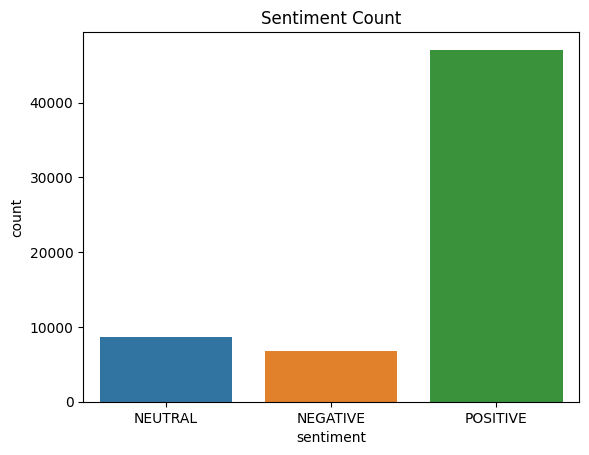

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sentiment distribution
sns.countplot(data=df, x='sentiment')
plt.title("Sentiment Count")
plt.show()

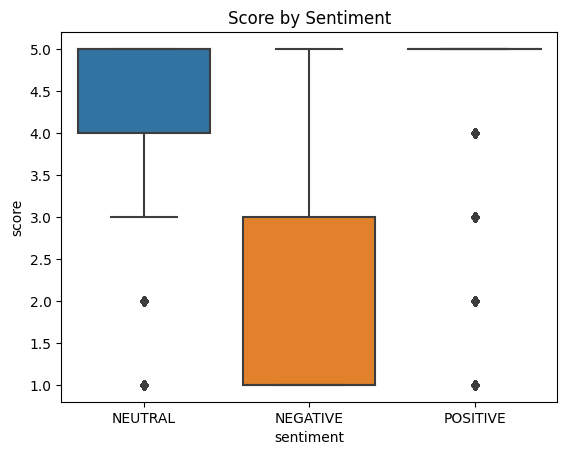

In [7]:
# Score vs Sentiment
sns.boxplot(data=df, x='sentiment', y='score')
plt.title("Score by Sentiment")
plt.show()

In [8]:
import string
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# Fill NaNs and clean content
df['content'] = df['content'].fillna('').str.lower()

In [9]:
# Split data
X = df['content']
y = df['sentiment']

In [10]:
# TF-IDF vectorization
vectorizer = TfidfVectorizer(stop_words='english', max_features=3000)
X_vec = vectorizer.fit_transform(X)

In [11]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_vec, y, test_size=0.2, random_state=42)

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Train Logistic Regression
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

LogisticRegression(max_iter=200)

In [13]:
# Predict
y_pred = model.predict(X_test)

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.8800191586173864
              precision    recall  f1-score   support

    NEGATIVE       0.80      0.67      0.73      1392
     NEUTRAL       0.70      0.58      0.64      1733
    POSITIVE       0.92      0.96      0.94      9402

    accuracy                           0.88     12527
   macro avg       0.80      0.74      0.77     12527
weighted avg       0.87      0.88      0.87     12527



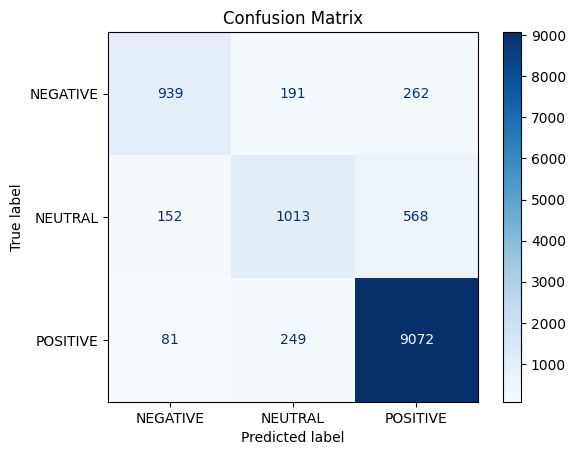

In [14]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()